In [1]:
from skimage.io import imread_collection

#path 
col_dir = '../images/*.png'
collection = imread_collection(col_dir)

In [2]:
import numpy as np
from scipy import fftpack

Xff2 = [np.ravel(np.abs(fftpack.fft2(col)))for col in collection] 

In [3]:
Xff2 = np.asarray(Xff2)

In [5]:
y = np.loadtxt('../ClasificacionPMG.csv',skiprows=1, delimiter=',')[:,1]

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(Xff2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
%matplotlib inline

from sklearn.svm import SVC                             # SVM  

# Para separar los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

In [9]:
clasificadores = [               
    SVC(kernel="linear", C=0.025),            # SVC lineal con C = 0.025
    SVC(gamma=2, C=1),                        # SVC gaussiano con gamma = 2 y C = 1
]

# Solo para fines de graficación
titulos = ["SVM lineal", 
           "SVM gaussiano"]


In [10]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

   
print('\n' * 3)
print("*"*30 + "\n")
print("Base de datos " + str(1))
print("*"*30 + "\n")

figure = plt.figure(figsize=(20, 10))
X = pca.transform(Xff2)






******************************

Base de datos 1
******************************



<Figure size 1440x720 with 0 Axes>

In [53]:
X.nbytes

8848

In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

p1 = np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02)
p2 = np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02)

In [55]:
p1.nbytes

698103536

In [14]:
# Meshgrid para pintar las regiones
xx, yy = np.meshgrid(p1 , p2)


MemoryError: 

In [ ]:
# Por cada clasificador
for (i, (titulo, clf)) in enumerate(zip(titulos, clasificadores)):

    # Escoge el subplot
    ax = plt.subplot(1, 2, i + 1)

    # El entrenamiento!!!!
    clf.fit(X_train, y_train)

    # Encuentra el error de validación
    score = clf.score(X_test, y_test)

    # Clasifica cada punto en el meshgrid
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Asigna un color a cada punto
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Grafica los datos de entrenamiento y prueba
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(titulo, size=30)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=30, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [14]:
from sklearn.naive_bayes import GaussianNB              # Naive bayes

# Genera conjuntos de datos para validación cruzada
from sklearn.model_selection import ShuffleSplit

# Para encontrar el mejor valor de un parámetro
from sklearn.model_selection import GridSearchCV


# Métodos de curvas de aprendizaje y análisis 
# ---------------------------------------------

# Para hacer curvas de aprendizaje
from sklearn.model_selection import learning_curve

# Para hacer curvas de validación
from sklearn.model_selection import validation_curve


# Establecer un flujo de trabajo de ML
#-------------------------------------
from sklearn.pipeline import Pipeline


In [36]:
def plot_curva_aprendizaje(estimator, title, X, y, ylim=None, cv=None,
                           n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Genera una curva de aprendizaje

    estimator : Objeto clasificador con métodos `fit` y `predict`

    title : Titulo de la figura.

    X : `ndarray` con shape (n_nuestras, n_atributos)

    y : `ndarray` con shape (n_muestras) 

    ylim : tupla (ymin, ymax), opcional. Máximos y mínimos en la gráfica.

    cv : int, cross-validation generator, opcional. Número de folders en K-fold-cross-validation

    n_jobs : int, opcional. Número de tareas en paralelo.
    
    train_sizes : ndarray. Valores a los cuales se hace un punto para gener la curva de aprendizaje
    """


    
    ####################################################################
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    ####################################################################
    """
    print('train_sizes')
    print(train_sizes)
    print('train_scores')
    print(train_scores)
    print('test_scores')
    print(test_scores)
    """
    
    # EL marco de la gráfica
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(u"Ejemplos de entrenamiento")
    plt.ylabel(u"Error de predicción")
    
    train_mean = np.mean(1 - train_scores, axis=1)
    train_std = np.std(1 - train_scores, axis=1)
    test_mean = np.mean(1 - test_scores, axis=1)
    test_std = np.std(1 - test_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label=u"Entrenamiento")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label=u"Validación")

    plt.legend(loc="best")
    
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\nelso\\Anaconda3\\envs\\tesis\\lib\\site-packages\\matplotlib\\pyplot.py'>

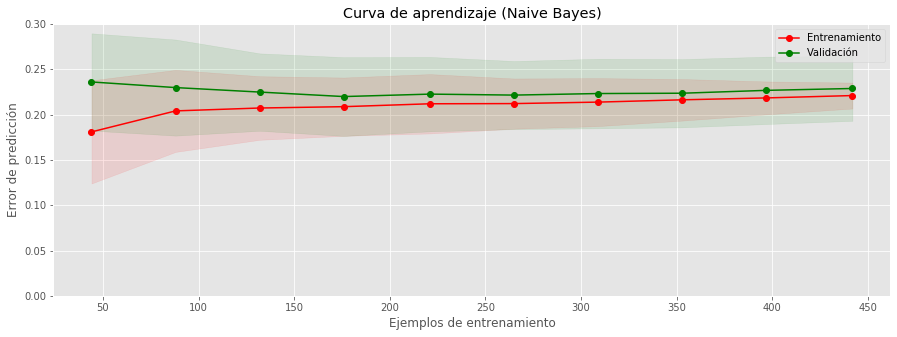

In [37]:
# Validación cruzada con 100 folders (20 por ciento de datos de validación)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# Clasificador tipo Naive bayes gaussiano
clf = GaussianNB()

#Curva de aprendizaje
plt.rcParams['figure.figsize'] = (15, 5)
plot_curva_aprendizaje(clf, "Curva de aprendizaje (Naive Bayes)", 
                       X, y, ylim=(0, 0.3), cv=cv, n_jobs=1)


#### Ejercicio 2.

Responde a las siguiente preguntas:

1. ¿Hay alto sezgo, alta varianza, o el resultado es correcto?
2. ¿Hay sobre aprendizaje, sub aprendizaje o es correcto?
3. ¿Se necesitarían más datos?
4. Indica 3 posibles acciones a considerar en este caso (de ser necesario).


## 2.3. Analizando una máquina de vector de soporte con kernel gaussiano

En este caso, vamos a analizar un clasificador cuyo aprendizaje es más complejo (y por lo tanto toma más tiempo). Por esta razón vamos a limitarnos a una validación cruzada de 10 folders.

<module 'matplotlib.pyplot' from 'C:\\Users\\nelso\\Anaconda3\\envs\\tesis\\lib\\site-packages\\matplotlib\\pyplot.py'>

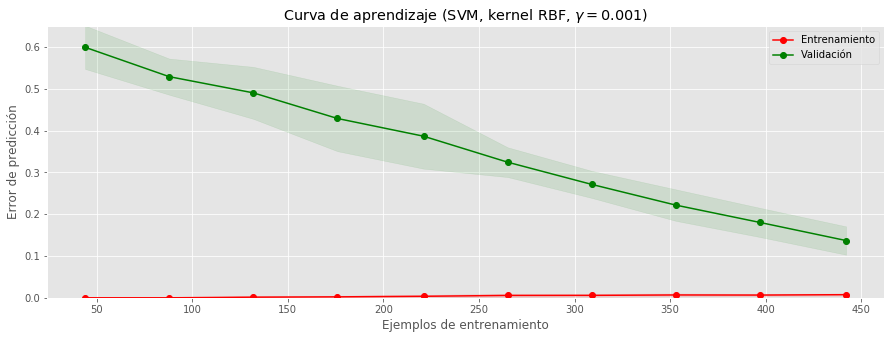

In [51]:
# Validación cruzada de 10 folders (20 por ciento de datos de validación)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Clasificador SVM con kernel gaussiano y gamma=0.001
clf = SVC(gamma=0.001)

#Curva de aprendizaje
plt.rcParams['figure.figsize'] = (15, 5)
plot_curva_aprendizaje(clf, "Curva de aprendizaje (SVM, kernel RBF, $\gamma=0.001$)", 
                       X, y, ylim=(0, 0.65), cv=cv, n_jobs=1)


#### Ejercicio 3.

Responde a las siguiente preguntas:

1. ¿Hay alto bias, alta varianza, o el resultado es correcto?
2. ¿Hay sobre aprendizaje, sub aprendizaje o es correcto?
3. ¿Se necesitarían más datos?
4. Indica 3 posibles acciones a considerar en este caso (de ser necesario).


## 2.4. Curva de validación para el parámetro $\gamma$

Vamos ahora a graficar la curva de validación para diferentes parámetros de $\gamma$ sobre el clasificador por máquinas de vactores de soporte con kernel gaussiano. Dado que los cambios que se pueden percibir son muy pequeños, a menos que el parámetro de varía en forma logarítmica (esto es, en relación a sus ordenes de magnitud), pues la curva de validación la vamos a realizar utilizando una escala logarítmica.

(0.0, 0.2)

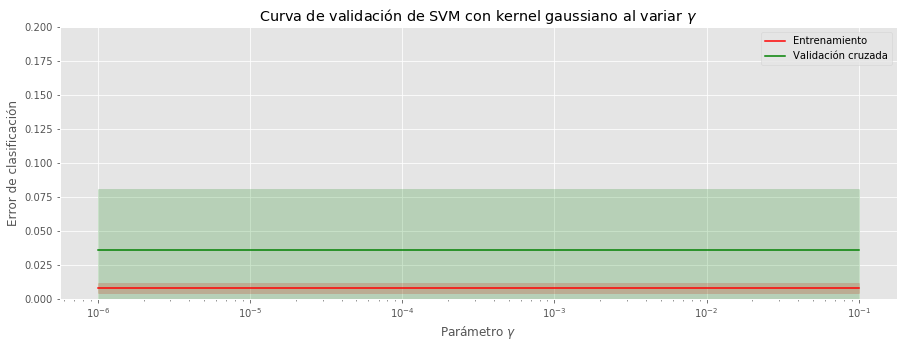

In [41]:
# Los valores que le vamos a dar a \gamma
param_range = np.logspace(-6, -1, 5)

# La curva de validación con 10 fold-cross-validation
train_scores, test_scores = validation_curve(SVC(), X, y, 
                                             param_name="gamma", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=1)

train_mean = np.mean(1 - train_scores, axis=1)
train_std = np.std(1 - train_scores, axis=1)

test_mean = np.mean(1 - test_scores, axis=1)
test_std = np.std(1 - test_scores, axis=1)


plt.rcParams['figure.figsize'] = (15, 5)

# Plot de los resultados de entrenamiento
plt.semilogx(param_range, train_mean, label="Entrenamiento", color="r")
plt.fill_between(param_range, 
                 train_mean - train_std,
                 train_mean + train_std, 
                 alpha=0.2, color="r")

# Plot de los resultados de validación
plt.semilogx(param_range, test_mean, label=u"Validación cruzada", color="g")
plt.fill_between(param_range, 
                 test_mean - test_std,
                 test_mean + test_std, 
                 alpha=0.2, color="g")

plt.title(u"Curva de validación de SVM con kernel gaussiano al variar $\gamma$")
plt.xlabel(u"Parámetro $\gamma$")
plt.ylabel(u"Error de clasificación")
plt.legend(loc="best")
plt.ylim(0.0, 0.2)



#### Ejercicio 4.

Responde a las siguiente preguntas:

1. ¿En que valor de $\gamma$ hay claramente sobreaprendizaje?
2. ¿En que valor de $\gamma$ hay claramente subaprendizaje?
3. ¿Cual sería a t consideración el mejor valor de $\gamma$?


## 3. Automatización de tareas

Hacer las tareas repetitivas, tales como ajustar parámetros, o utilizar una serie de pasos en un proceso de reconocimiento de partones, son el tipo de problemas que son claramente automatizables. En esta sección vamos a ver como automatizar dos tareas: el uso de un método de preprocesamiento de señales conectado a un mñetodo de clasificación utilizando un `pipeline`; y el proceso de optimización de los valores de los parámetros utilizando curvas de validación (calibración). 

Recuerda que estos son solo dos ejemplos de formas de automatización y que existen otros más ya contemplados dentro de la librería `sklearn`.

### 3.1. Automatización de procedimientos que se realizan en serie

Vamos a asumir que queremos realizar el reconocimiento de digitos escritos a mano (el mísmo conjunto de datos original), pero ahora utilizando otro enfoque. Vamos a preprocesar los datos utilizando análisis en componentes principales (PCA), y luego aplicando un clasificador por regresión logística con regularización. 

Es importante de ver que en el aprendizaje hay que ajustar la matriz de transformación y la normalización de datos en el PCA, para luego utilizar esos resultados para el ajuste de los pesos del regresor logístico. De la misma manera, para reconocer nuevos datos, es necesario normalizarlos y rotarlos de acuerdo al algoritmo de PCA, para que su resultado sea utilizado dentro de la regresión logística. Así, las operacions (tanto de reconocimiento como aprendizaje) se hacen en serie, o en `pipeline` para utilizar un término muy común para quienes utilizan la linea de comandos en UNIX.

Vamos entonces a definir un *pipeline* con estas dos unidades de procesamiento


In [45]:
from sklearn.linear_model import  LogisticRegression    # Logística con regularización

# El tratamiento de los datos por PCA 
# con la asignación por default de sus parámetros
pca = PCA(random_state=0)

msv = SVC()

# Siempre que se haga entrenamiento o predicción, hay que
# aplicar pca primero y logistic después
pipe = Pipeline(
    steps=[
        ('acp', pca), 
        ('svm', msv)
    ]
)

# Ahora en pipe tenemos un clasificador, de tal forma que 
# pipe.fit(X, y) ajusta ambos métodos, y
# pipe.predict(X) realiza la prediccion (entre otros operadores genéricos de un clasificador)


### 3.2. Optimizador de parámetros por curvas de validación

Como es posible observar, no es necesario visualizar las curvas de calibración, ya que el mejor valor para una variable es cuando el error de validación es el menor posible. Así que es claro que la tarea de encontra el mejor valor posible para uno o varios parámetros, es probar sobre un conjunto de valores, y seleccionar los valores de los parámetros que ofrezcan el menor error de validación posible.

Al ser esta una tarea fácilmente automatizable, es de esperar que exista ya algo así dentro del modulo de `sklear`. Y efectivamente, existe, para un conjunto finito y predefinido de valores en los cuales buscar.

In [46]:
# Se escogen dos parámetros a ajustas: 
#       a) El número de componentes principales del PCA
#       b) El valor de C (regularización) para la regresión logística

# EL número de componentes principales podrá ser 20, 40 o todos
n_componentes = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# El parámetro C varia como 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000
#Cs = np.logspace(-4, 4, 8)

#gamma=0.001
param_range = np.logspace(-6, -1, 5)

# Genera un clasificador con optimizador de parámetros en el aprendizaje
#        a) Utiliza el clasificador definido en pipe
#        b) Los parámetros a ajustar se ponen en un diccionario {var1: valores_var1, var2:valores_var2}
#        c) pca__n_components es equivalente a pipe.pca.n_components (para poderlo poner en strings)
#        d) logistic__C es equivalente a la variable pipe.logistic.C
# 
# Al ser el clasificador un pipeline, los parámetros se encuentran en esa forma de la estructura.

clf = GridSearchCV(
    pipe,
    dict(
        acp__n_components= n_componentes,
        svm__gamma = param_range
    ),
    cv=3
)

# Ahora clf es un objeto clasificador, que si se ejecuta clf.fit(X,y)
# ajusta los objetos pca y logistic y ajusta los parámetros pca.n_components y logistic.C de
# acuerdo al conjunto de posibles parámetros que le introducimos. El reconocimiento y el resto de
# las funciones son similares a las que tenía pipe



### 3.3 Aplicando el aprendizaje

In [48]:
clf.fit(Xff2, y)

print("El mejor valor de regularización es: {}".format(clf.best_estimator_.named_steps['svm'].gamma))
print("El número óptimo de componentes principales es: {}".format(clf.best_estimator_.named_steps['acp'].n_components))

El mejor valor de regularización es: 1e-06
El número óptimo de componentes principales es: 2


In [56]:
clf.fit(X, y)

print("El mejor valor de regularización es: {}".format(clf.best_estimator_.named_steps['svm'].gamma))
print("El número óptimo de componentes principales es: {}".format(clf.best_estimator_.named_steps['acp'].n_components))

AttributeError: 'SVC' object has no attribute 'best_estimator_'

#### Ejercicio 5.

Prueba de realizar la clasificación de los digitos utilizando un clasificador por máquina de vector de soporte con kernel lineal combinado con análisis en componentes principales.

1.  Encuentra los mejores valores para al menos dos parámetros diferentes.

2. Grafica la curva de aprendizaje y escribe las posibles ventajas y desventajas del método en relación a los métodos de Naive Bayes y de SVM con kernel gaussiano vistos anteriormente

